In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('./processed_zomato_dataset.csv')
data

name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51037  Best Brews - Four Points by Sheraton Bengaluru...           No   
51038                           Vinod Bar And Restaurant           No   
51039  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51040  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51041                       The Nest - The Den Bengaluru           No   

      book_table      rate  votes                    location  \
0            Yes  4.100000    775                Banashankari   
1             No  4.100000    787                Banashankari   
2             No  3.800000    918                Banashankari   
3             No  3.700000     88                Banashankari   
4             No  3.800000    166                Basavanagudi   
...          ...       ...    ...                         ...   
51037         No  3.600000     27                  Whitefield   
51038         No  3.700142      0                  Whitefield   
51039         No  3.700142      0                  Whitefield   
51040        Yes  4.300000    236  ITPL Main Road, Whitefield   
51041         No  3.400000     13  ITPL Main Road, Whitefield   

                 rest_type                                         dish_liked  \
0            Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1            Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3              Quick Bites                                        Masala Dosa   
4            Casual Dining                                Panipuri, Gol Gappe   
...                    ...                                                ...   
51037                  Bar                                            Biryani   
51038                  Bar                                            Biryani   
51039                  Bar                                            Biryani   
51040                  Bar                       Cocktails, Pizza, Buttermilk   
51041   Bar, Casual Dining                                            Biryani   

                                     cuisines    cost  listedin_type  \
0              North Indian, Mughlai, Chinese   800.0         Buffet   
1                 Chinese, North Indian, Thai   800.0         Buffet   
2                      Cafe, Mexican, Italian   800.0         Buffet   
3                  South Indian, North Indian   300.0         Buffet   
4                    North Indian, Rajasthani   600.0         Buffet   
...                                       ...     ...            ...   
51037                             Continental  1500.0  Pubs and bars   
51038                             Finger Food   600.0  Pubs and bars   
51039                             Finger Food  2000.0  Pubs and bars   
51040                             Finger Food  2500.0  Pubs and bars   
51041  Finger Food, North Indian, Continental  1500.0  Pubs and bars   

               city  
0      Banashankari  
1      Banashankari  
2      Banashankari  
3      Banashankari  
4      Banashankari  
...             ...  
51037    Whitefield  
51038    Whitefield  
51039    Whitefield  
51040    Whitefield  
51041    Whitefield  

[51042 rows x 12 columns]

### 13/07/2024 Data Visualization2 using Radar Chart

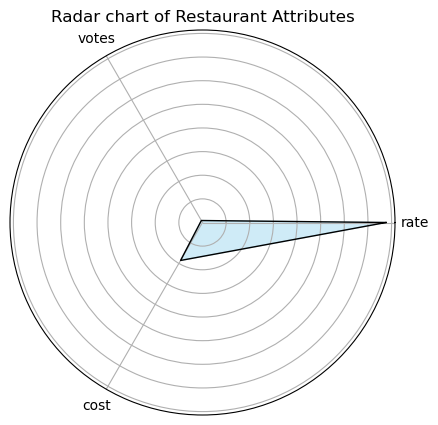

In [28]:
import numpy as np
import matplotlib.pyplot as plt


radar_data = data.groupby('rest_type').agg({'rate':'mean','votes':'mean','cost':'mean'}).reset_index()
normalized_data = radar_data.drop('rest_type',axis=1).apply(lambda x:(x - np.min(x))/(np.max(x) - np.min(x)))
num_vars = len(normalized_data.columns)
angles = np.linspace(0,2*np.pi, num_vars,endpoint=False).tolist()
values = normalized_data.iloc[0].tolist()
values = values+values[:1]
angles = angles+angles[:1]
fig, ax = plt.subplots(figsize=(5,5),subplot_kw = dict(polar=True))
ax.plot(angles,values,color='black',linewidth=1)
ax.fill(angles,values,color='skyblue',alpha=0.4)
ax.set_title('Radar chart of Restaurant Attributes')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(normalized_data.columns,fontsize=10)
ax.set_yticklabels([])
plt.show()

In [ ]:
angles = angles + angles[:1]
fig,axs = plt.subplots(len(grouped_data), figs)
for i,row in normalized_data.iterrows():
    values = row.tolist()
    values = values + values[:1]
    ax = axs[i] if len(grouped_data) * 5), subplot_kw=dict(polar=True)
    ax.fill(angles, values,color='skyblue',alpha=0.4)
    ax.plot(angles, values,color='black',linewidth )

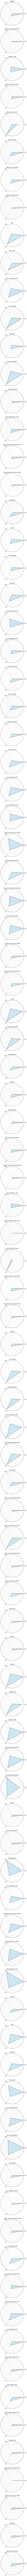

In [32]:
grouped_data = data.groupby('rest_type').agg({'rate': 'mean', 'votes': 'mean', 'cost':'mean'}).reset_index()

normalized_data = radar_data.drop('rest_type', axis=1).apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

num_vars = len(normalized_data.columns)

angles = np.linspace(0,2 * np.pi, num_vars, endpoint=False).tolist()

angles = angles + angles[:1]

fig, axs = plt.subplots(len(grouped_data), figsize=(5,len(grouped_data) * 5), subplot_kw=dict(polar=True))



for i, row in normalized_data.iterrows():

  values = row.tolist()

  values = values + values[:1]

  ax = axs[i] if len(grouped_data) > 1 else axs

  ax.fill(angles, values, color='skyblue', alpha=0.4)

  ax.plot(angles, values, color='black',linewidth=1)

  ax.set_title(grouped_data['rest_type'][i])

  ax.set_xticks(angles[:-1])

  ax.set_xticklabels(normalized_data.columns, fontsize=10)

  ax.set_yticklabels([])

plt.show();

### III. Compostion Charts

## Pi charts

In [38]:
restaurant_count = data.listedin_type.value_counts()
plt.pie(restaurant_count, labels = restaurant_count.index, explode=[0,0,0.02,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%')
plt.title('Percentage of service type in Restaurants')
plt.show()


SyntaxError: invalid syntax (856680125.py, line 1)

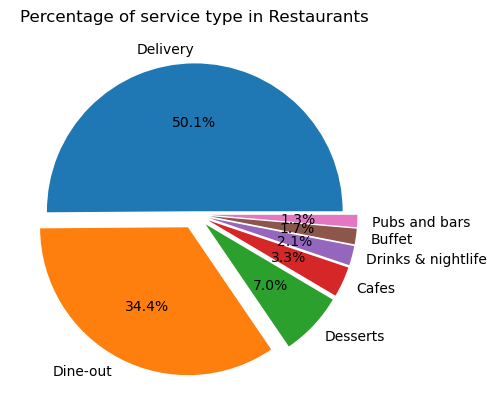

In [39]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'listedin_type' is a column in the DataFrame

restaurant_count = data['listedin_type'].value_counts()
explode = [0.02 if i == restaurant_count.index[0] else 0.1 for i in restaurant_count.index]
plt.pie(restaurant_count, labels = restaurant_count.index, explode=explode, autopct='%1.1f%%')
plt.title('Percentage of service type in Restaurants')
plt.show()

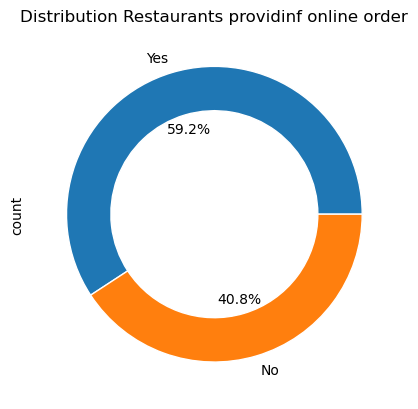

In [36]:
data['online_order'].value_counts().plot(kind='pie',autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
plt.title('Distribution Restaurants providinf online order')
plt.show()

## Stacked Bar chart

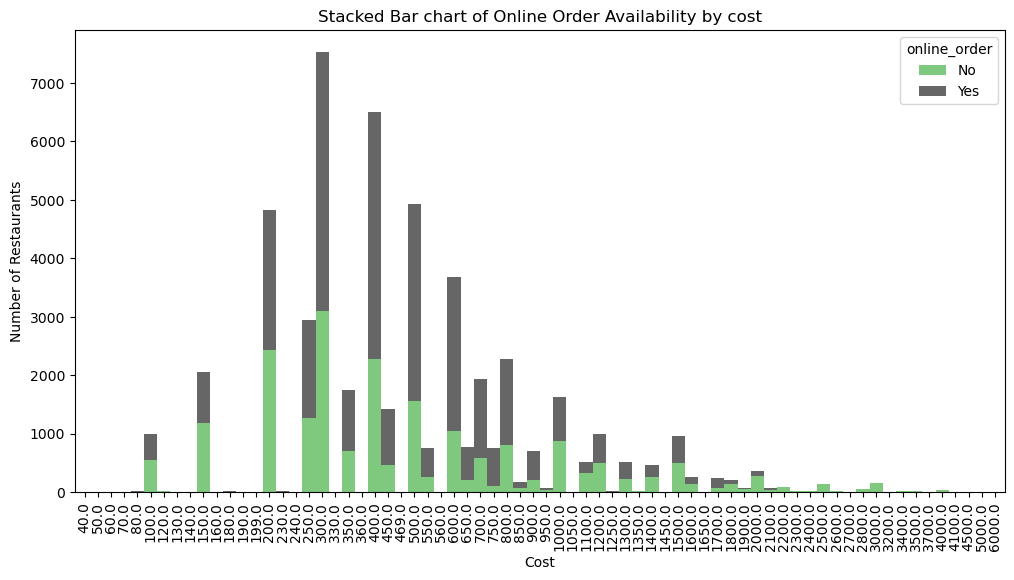

In [37]:
online_order_cost = data.groupby(['cost','online_order']).size().unstack()
online_order_cost.plot(kind='bar',stacked=True,figsize=(12,6), cmap='Accent',width=1)
plt.title('Stacked Bar chart of Online Order Availability by cost')
plt.ylabel("Number of Restaurants")
plt.xlabel('Cost')
plt.show()

## Grouped Bar chart

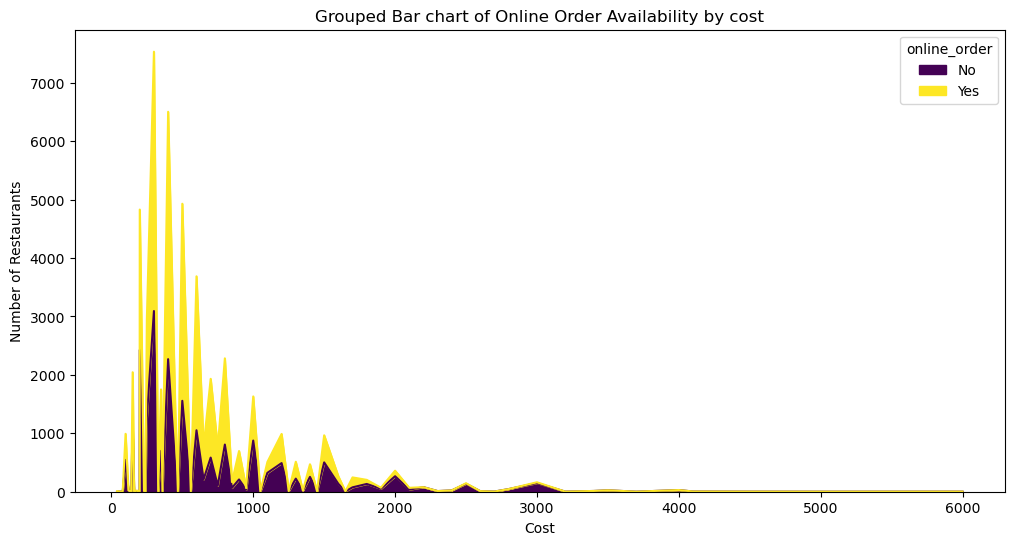

In [44]:
online_order_cost = data.groupby(['cost','online_order']).size().unstack()
online_order_cost.plot(kind='area',stacked=True,figsize=(12,6), cmap='viridis')
plt.title('Grouped Bar chart of Online Order Availability by cost')
plt.ylabel("Number of Restaurants")
plt.xlabel('Cost')
plt.show()

## Venn Diagram

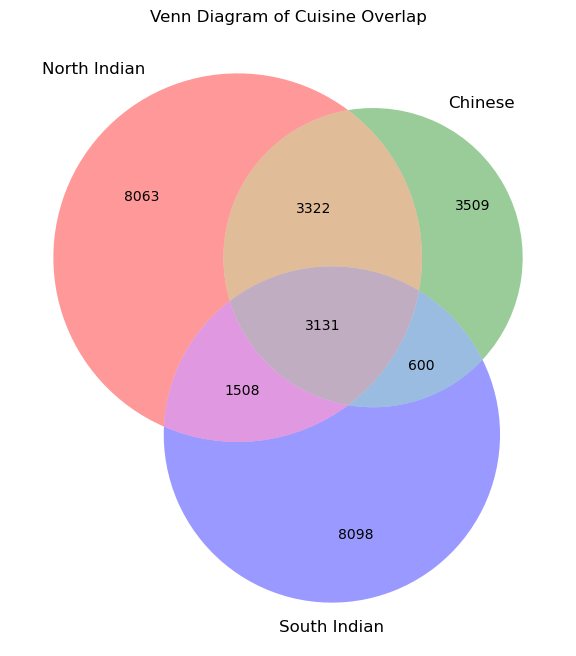

In [53]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Assuming 'data' is your pandas DataFrame

set1 = set(data[data['cuisines'].str.contains('North Indian')].index)
set2 = set(data[data['cuisines'].str.contains('Chinese')].index)
set3 = set(data[data['cuisines'].str.contains('South Indian')].index)

plt.figure(figsize=(8,8))
venn3(subsets = (len(set1 - set2 - set3), len(set2 - set1 - set3), len(set3 - set1 - set2), 
                  len(set1 & set2 - set3), len(set1 & set3 - set2), len(set2 & set3 - set1), 
                  len(set1 & set2 & set3)), 
        set_labels = ('North Indian', 'Chinese', 'South Indian'))
plt.title('Venn Diagram of Cuisine Overlap')
plt.show()

## Histogram

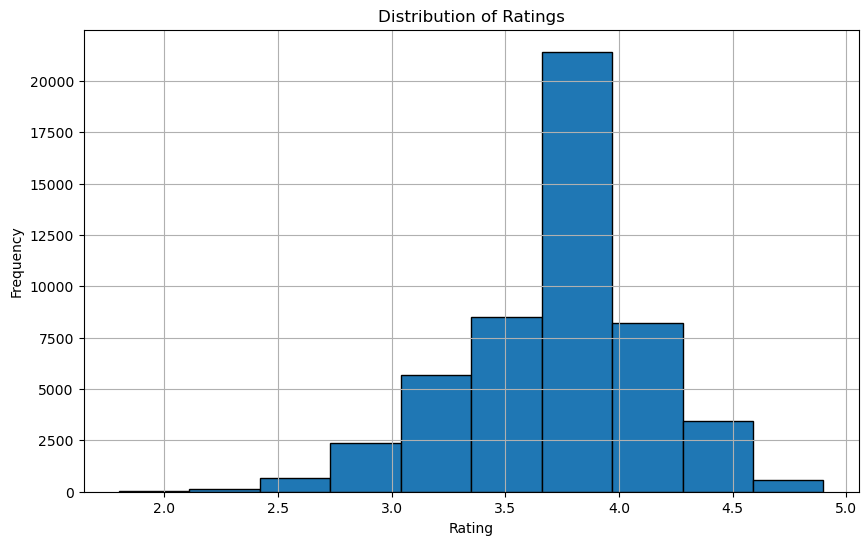

In [54]:
plt.figure(figsize=(10,6))
plt.hist(data['rate'], edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.grid(True)
plt.show()

## Density Error

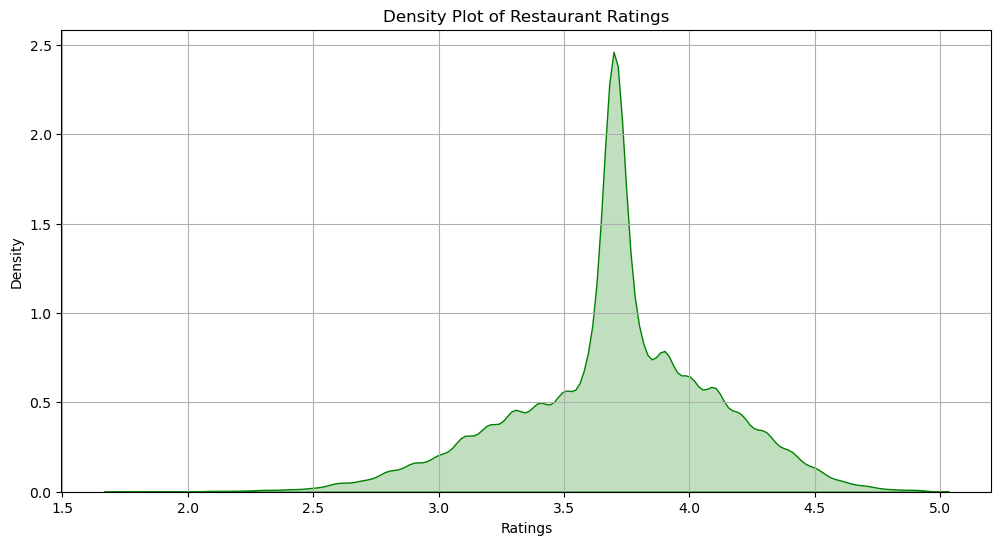

In [58]:
plt.figure(figsize=(12,6))
##Kernel Density Estimation
sns.kdeplot(data['rate'],fill=True, color='green')
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.title('Density Plot of Restaurant Ratings')
plt.grid(True)
plt.show()

## Box plot

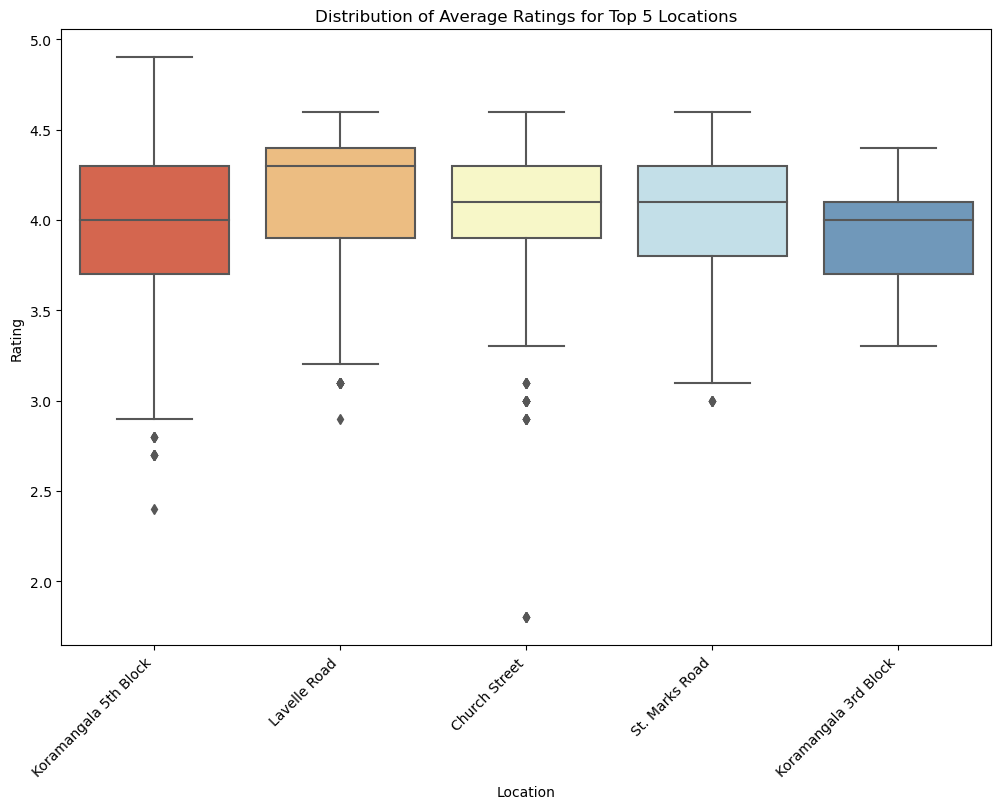

In [66]:
max_ratings = data.groupby('location')['rate'].mean().reset_index()
sorted_max_ratings = max_ratings.sort_values(by='rate', ascending=False)
top_5_locations = sorted_max_ratings.head(5)['location']
filtered_data = data[data['location'].isin(top_5_locations)]
plt.figure(figsize=(12,8))
sns.boxplot(x='location',y='rate',data=filtered_data,palette='RdYlBu')
plt.title('Distribution of Average Ratings for Top 5 Locations')
plt.xlabel('Location')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

## Violin Plot

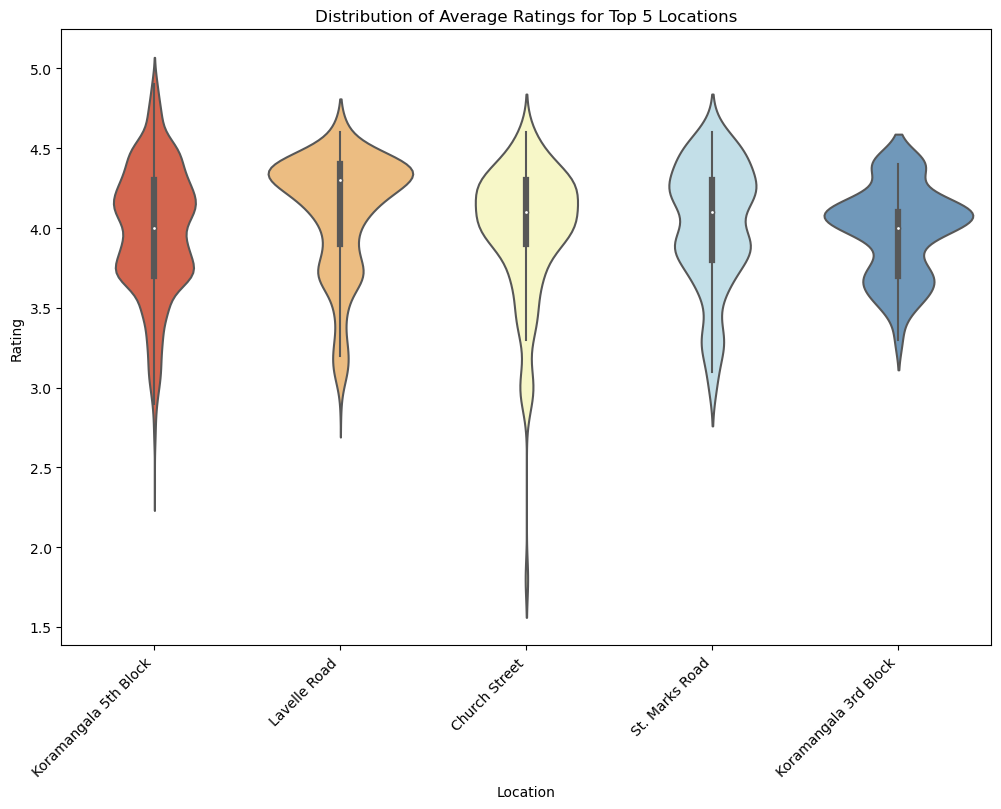

In [82]:
max_ratings = data.groupby('location')['rate'].mean().reset_index()
top_5_locations = sorted_max_ratings.head(5)['location']
filtered_data = data[data['location'].isin(top_5_locations)]
plt.figure(figsize=(12,8))
sns.violinplot(x='location',y='rate',data=filtered_data,palette='RdYlBu')
plt.title('Distribution of Average Ratings for Top 5 Locations')
plt.xlabel('Location')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

## V. GEO Plots

In [81]:
import plotly.express as px

dot_map = pd.read_csv('./indian_states_covid_data.csv')
dot_map.head()

State  Confirmed  Recovered  Deaths  Latitude  Longitude
0     Maharashtra    2000000    1800000   50000   19.7515    75.7139
1          Kerala    1500000    1400000   30000   10.8505    76.2711
2       Karnataka    1000000     950000   20000   15.3173    75.7139
3      Tamil Nadu     900000     850000   15000   11.1271    78.6569
4  Andhra Pradesh     800000     750000   10000   15.9129    79.7400

In [92]:
fig = px.scatter_mapbox(dot_map,
                        lat = "Latitude",
                        lon = "Longitude",
                        hover_name="State",
                        size = "Confirmed",
                        size_max=20,
                        zoom=1,
                        color = 'Confirmed',
                        color_continuous_scale=px.colors.sequential.Plasma,
                        mapbox_style="carto-positron",
                        title='Confirmed cases by state')
fig.show();


## Choropleth Map

In [93]:
import plotly.express as px

choro_map = pd.read_csv('./population_density.csv')
choro_map

Country  Population Density
0  United States                  36
1         Canada                   4
2         Brazil                  25
3         Russia                   9
4          India                 464
5          China                 153
6      Australia                   3
7        Germany                 233
8         France                 119
9          Japan                 347

In [97]:
fig = px.choropleth(choro_map,
                        locations="Country",
                        locationmode='country names',
                        color = 'Population Density',
                        color_continuous_scale=px.colors.sequential.Plasma,
                        title='Popoulation Density By country')
fig.show();